![title](../../NAG_logo.png)
# Principal Component Analysis

This notebook illustrates how to pass data to the NAG Library, it will be based on the NAG function [`naginterfaces.library.mv.prin_comp`](https://www.nag.com/numeric/py/nagdoc_latest/naginterfaces.library.mv.prin_comp.html#naginterfaces.library.mv.prin_comp) and will provide a basic principal component analysis example.

For more details on the model, consult [here](https://www.nag.com/numeric/nl/nagdoc_latest/flhtml/g03/g03intro.html).

In [6]:
import numpy as np
import pandas as pd
from naginterfaces.library import mv

## R.A. Fisher's Iris dataset

Fisher, R.A. "The use of multiple measurements in taxonomic problems" Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to Mathematical Statistics" (John Wiley, NY, 1950).

Download the [iris dataset here](https://archive.ics.uci.edu/ml/datasets/Iris).


In [7]:
# Get the dataset
iris = pd.read_csv('iris.csv', header=None)
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
pca = mv.prin_comp('V', 'E', iris.iloc[:,0:4], isx=[1,1,1,1], s=[0.0, 0.0, 0.0, 0.0], nvar=4)

<IPython.core.display.Javascript object>


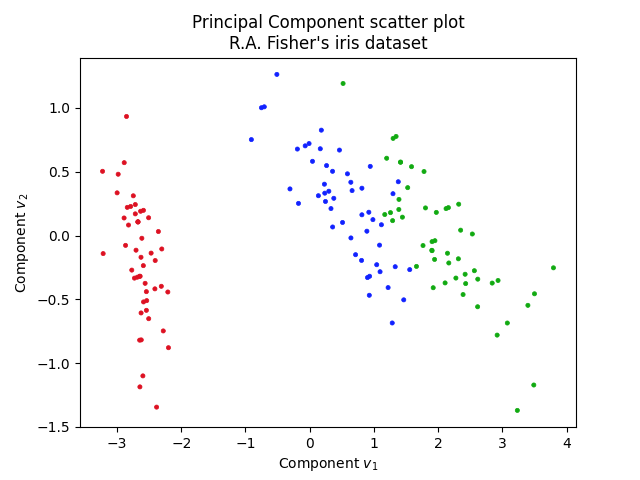

In [9]:
%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('nbagg')
c = ['#DD1122' for x in range(50)] + ['#1122FF' for x in range(50)] + ['#11AA11' for x in range(50)]
plt.figure(0)
plt.scatter(pca.v[:,0], pca.v[:,1], c=c, marker='.', linewidth=0.5)
plt.xlabel('Component $v_1$')
plt.ylabel('Component $v_2$')
# plt.legend(loc='top right')
plt.title(
    'Principal Component scatter plot\n'
    'R.A. Fisher\'s iris dataset'
)
plt.show()

<IPython.core.display.Javascript object>


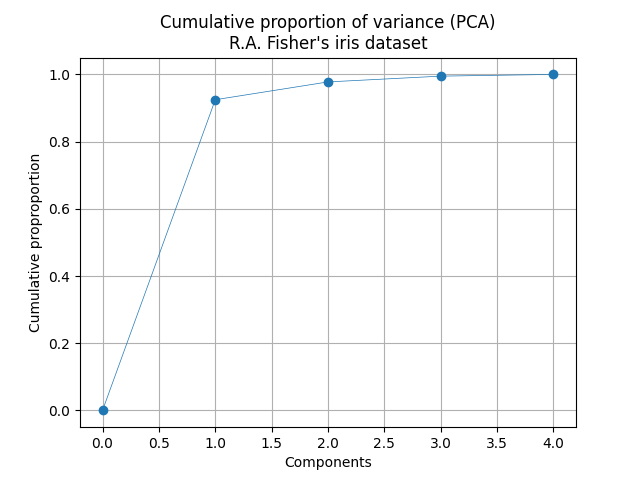

In [10]:
# Plot the cumulative proportion of variance explained by the principal components
plt.figure(1)
plt.plot(range(5), np.append(0.0, pca.e[:,2]), marker='o', linewidth=0.5)
plt.xlabel('Components')
plt.ylabel('Cumulative proproportion')
plt.title('Cumulative proportion of variance (PCA)\nR.A. Fisher\'s iris dataset')
plt.grid()
plt.show()